Import Libraries

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Read Dataset from Kaggle

In [127]:
laptop = pd.read_csv('laptop_prices.csv')
laptop

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


# Simple Linear Regression

I will use the *Inches* column to predict prices of laptops

In [128]:
laptop[laptop.Inches.isna()]
laptop[laptop.Price_euros.isna()]

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model


In [129]:
X = laptop.iloc[:, 3].values.reshape(-1,1)
y = laptop.iloc[:, 7].values
print(X)
print(y)

[[13.3]
 [13.3]
 [15.6]
 ...
 [14. ]
 [15.6]
 [15.6]]
[1339.69  898.94  575.   ...  229.    764.    369.  ]


There are no missing values for either Inches or Price_euros

Now we split data into training and testing stages

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

We will train using Simple Linear Regression model

In [131]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

Time for predictions

In [132]:
y_pred = regressor.predict(X_test)
print("Size in inches: ")
print (X_test)
print ("prediction: ")
print (y_pred)
print("Actual: ")
print(y_test)

Size in inches: 
[[15.6]
 [12.5]
 [13.3]
 [15.6]
 [15.6]
 [15.6]
 [15.6]
 [15.6]
 [15.6]
 [15.6]
 [15.6]
 [14. ]
 [17.3]
 [15.6]
 [15.6]
 [15.6]
 [12.3]
 [15.6]
 [13.3]
 [15.6]
 [14. ]
 [13.3]
 [15.6]
 [15.6]
 [13.3]
 [14. ]
 [15.6]
 [15.6]
 [15.6]
 [13.3]
 [11.6]
 [11.6]
 [14. ]
 [15.6]
 [17.3]
 [15.6]
 [14. ]
 [15.6]
 [17.3]
 [13.3]
 [15.6]
 [15.6]
 [15.6]
 [14. ]
 [15.6]
 [13.3]
 [11.6]
 [17. ]
 [17.3]
 [17.3]
 [15.6]
 [15.6]
 [15.6]
 [14. ]
 [15.6]
 [15.6]
 [12.5]
 [14. ]
 [15.6]
 [15.6]
 [14. ]
 [11.6]
 [12.5]
 [17.3]
 [17.3]
 [15.6]
 [17.3]
 [13.3]
 [13.3]
 [15.6]
 [15.6]
 [12.5]
 [13.3]
 [11.6]
 [15.6]
 [15.6]
 [13.3]
 [17.3]
 [15.6]
 [14. ]
 [14. ]
 [15.6]
 [14. ]
 [13.3]
 [15.6]
 [15.6]
 [15.6]
 [17.3]
 [15.6]
 [14. ]
 [14. ]
 [17.3]
 [12. ]
 [15.6]
 [15.6]
 [17.3]
 [14. ]
 [15.6]
 [15.6]
 [13.3]
 [15.6]
 [15.6]
 [14. ]
 [15.6]
 [13.3]
 [12.5]
 [14. ]
 [17.3]
 [15.6]
 [15.6]
 [14. ]
 [15.6]
 [11.6]
 [14. ]
 [17.3]
 [17.3]
 [15.6]
 [15.6]
 [15.6]
 [13.3]
 [15.6]
 [15.6]
 [15.6]

Visualizing the Training results

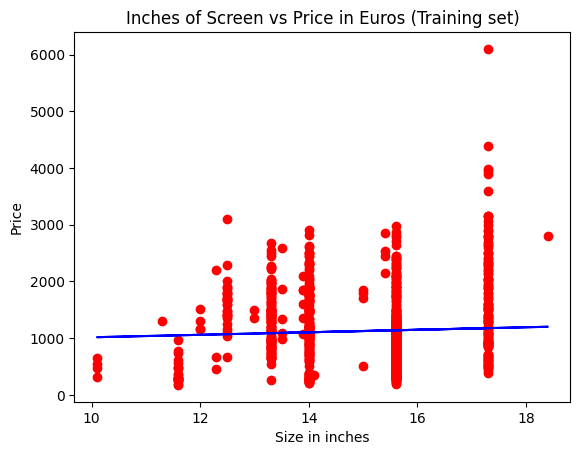

In [133]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Inches of Screen vs Price in Euros (Training set)')
plt.xlabel('Size in inches')
plt.ylabel('Price')
plt.show()

Visualizing the Test results

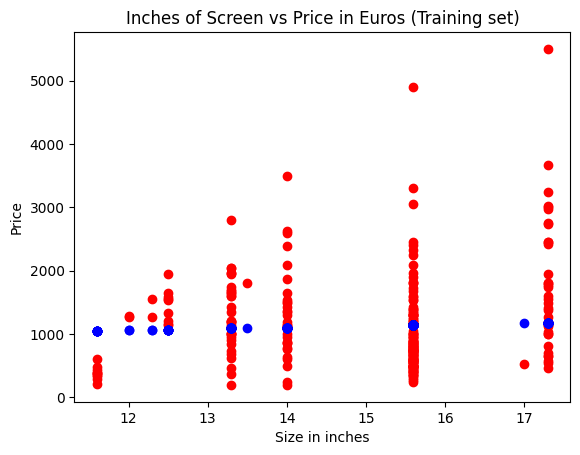

In [134]:
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Inches of Screen vs Price in Euros (Training set)')
plt.xlabel('Size in inches')
plt.ylabel('Price')
plt.show()

In [135]:
print(regressor.predict([[20]]))

[1235.069]


# Now We Move onto Multiple Linear Regression

In [136]:
laptop

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


Split the data, using Inches, Ram, CPU_freq, and Weight to Predict Price

In [148]:
X_m = (laptop.Weight.values + laptop.Ram.values + laptop.Inches.values + laptop.CPU_freq.values).reshape(-1,1)
y_m = laptop.Price_euros.values

Split data into training and testing sets

In [149]:
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, y_m, test_size=0.2, random_state=0)

Train the Multiple Linear Regression model on the training set

In [152]:
regressor_m = LinearRegression()
regressor_m.fit(X_m_train, y_m_train)

LinearRegression()

Predict Results

In [153]:
y_m_pred = regressor_m.predict(X_m_test)
np.set_printoptions(precision=3)
print(np.concatenate((y_m_pred.reshape(len(y_m_pred),1), y_m_test.reshape(len(y_m_test),1)),1))

[[ 880.302  689.   ]
 [ 892.015 1584.   ]
 [ 916.907  999.   ]
 [1763.219 2397.   ]
 [1081.63  1199.   ]
 [1109.45   767.8  ]
 [ 836.375  479.   ]
 [1114.575  665.   ]
 [1129.217  499.   ]
 [1203.159 1427.   ]
 [ 880.302  585.   ]
 [1010.616 2089.   ]
 [1359.829 1129.   ]
 [1202.427  869.   ]
 [1139.466 1296.99 ]
 [ 902.265  400.   ]
 [ 748.523 1559.   ]
 [ 848.089  398.49 ]
 [ 946.923 1599.   ]
 [ 865.66   649.   ]
 [ 704.597 1096.   ]
 [ 564.765  615.   ]
 [ 855.41   499.   ]
 [1224.39  1260.   ]
 [ 900.068 1419.   ]
 [ 495.947  199.   ]
 [1103.593  880.   ]
 [ 881.766  825.   ]
 [ 834.911  614.   ]
 [ 906.657 1690.   ]
 [ 452.021  355.   ]
 [ 404.434  340.   ]
 [2170.268 2382.   ]
 [ 843.696  447.   ]
 [3171.054 5499.   ]
 [1173.143  745.   ]
 [1010.616 1292.   ]
 [1158.501  499.   ]
 [2060.453 2456.34 ]
 [ 931.549  999.9  ]
 [1147.519 1390.   ]
 [1127.753 1579.   ]
 [1165.822 2249.   ]
 [1034.043  945.   ]
 [ 876.641  579.   ]
 [1531.874 2049.   ]
 [ 455.682  435.   ]
 [1334.206  5